# Loading the dependencies and libraries

In [1]:
from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as mno

# Loading the data

In [3]:
import pandas as pd

# Path to your CSV file
csv_path = '/Users/mac/Desktop/team_02/src/post_datathon/data/pulseox_dataset.csv'

# Read the CSV file using Pandas
df_initial = pd.read_csv(csv_path, low_memory=False)

# Data Preprocessing

In [4]:
df_initial

,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,subject_id,hospital_admission_id,icustay_id,source_db,hospitalid,numbedscategory,teachingstatus,...,delta_sofa_future_coagulation_24hr,sofa_future_coagulation_24hr,delta_sofa_future_liver_24hr,sofa_future_liver_24hr,delta_sofa_future_cardiovascular_24hr,sofa_future_cardiovascular_24hr,delta_sofa_future_cns_24hr,sofa_future_cns_24hr,delta_sofa_future_renal_24hr,sofa_future_renal_24hr
0,0,0,0,002-10050,183274,211144,eicu,71,100 - 249,False,...,1525.0,1.0,1525.0,0.0,1525.0,1.0,1525.0,0.0,1525.0,0.0
1,1,1,1,002-1007,178462,204935,eicu,71,100 - 249,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,002-10187,150828,169525,eicu,73,>= 500,True,...,1547.0,0.0,1547.0,0.0,1547.0,1.0,1547.0,0.0,1547.0,0.0
3,3,3,3,002-10306,198249,230427,eicu,63,100 - 249,False,...,1507.0,2.0,1507.0,0.0,1507.0,1.0,1507.0,0.0,1507.0,1.0
4,4,4,4,002-10324,188445,217835,eicu,73,>= 500,True,...,1537.0,1.0,1537.0,0.0,1537.0,1.0,1537.0,2.0,1537.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49088,44897,49088,49088,19995595,21784060,34670930,mimic_iv,9999,>= 500,True,...,1500.0,0.0,1500.0,2.0,1500.0,1.0,1500.0,0.0,1500.0,1.0
49089,44898,49089,49089,19995780,21942461,36805359,mimic_iv,9999,>= 500,True,...,1557.0,2.0,1557.0,0.0,1557.0,1.0,1557.0,2.0,1557.0,0.0
49090,44899,49090,49090,19997293,28847872,31877557,mimic_iv,9999,>= 500,True,...,1557.0,0.0,1557.0,0.0,1557.0,1.0,1557.0,1.0,1557.0,1.0
49091,44900,49091,49091,19997367,20617667,35616526,mimic_iv,9999,>= 500,True,...,1557.0,3.0,1557.0,2.0,1557.0,1.0,1557.0,1.0,1557.0,1.0


In [5]:
df_initial.shape

(49093, 142)

In [6]:
# Assume 'df_initial' is your DataFrame
column_names = df_initial.columns.tolist()

print("Column names:", column_names)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'datetime_hospital_admit', 'datetime_hospital_discharge', 'datetime_icu_admit', 'datetime_icu_discharge', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'delta_SpO2', 'delta_vitals_heart_rate', 'vitals_heart_rate', 'delta_vitals_resp_rate', 'vitals_resp_rate', 'delta_vitals_mbp_ni', 'vitals_mbp_ni', 'delta_vitals_sbp_ni', 'vitals_sbp_ni', 'delta_vitals_dbp_ni', 'vitals_dbp_ni', 'delta_vitals_mbp_i', 'vitals_mbp_i', 'delta_vitals_sbp_i', 'vitals_sbp_i', 'delta_vitals_dbp_i', 'vitals_dbp_i', 'delta_vitals_

## Keeping relevant columns only

In [7]:
# List of columns to keep (N.B I removed subject_id) 
columns_to_keep = ['hospital_admission_id', 'source_db', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'vitals_tempc', 'cbc_hemoglobin', 'bmp_sodium', 'bmp_bicarbonate', 'bmp_creatinine', 'sofa_past_overall_24hr', 'sofa_past_cardiovascular_24hr']

# Select only the columns you want to keep
df_filtered = df_initial[columns_to_keep]

In [8]:
df_filtered.shape

(49093, 25)

## Computing p50

In [9]:
# Create a Copy to ensure no modification of a slice of the original DataFrame
df_filtered = df_filtered.copy()
df_filtered.loc[:, 'p50'] = ((100 * (df_filtered['pO2']**2.711) / df_filtered['SpO2']) - (df_filtered['pO2']**2.711))**(1/2.711)

In [10]:
# checking our new list of columns 
column_names_withp50 = df_filtered.columns.tolist()

print("Column names:", column_names_withp50)

Column names: ['hospital_admission_id', 'source_db', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'vitals_tempc', 'cbc_hemoglobin', 'bmp_sodium', 'bmp_bicarbonate', 'bmp_creatinine', 'sofa_past_overall_24hr', 'sofa_past_cardiovascular_24hr', 'p50']


In [11]:
df_filtered.shape

(49093, 26)

## Handling outliers

In [12]:
# identify and handle potentially erroneous or extreme values in the specified columns by replacing them with NaN.
df_filtered.loc[df_filtered["pCO2"] == 0.0, "pCO2"] = np.NAN # for pCO2 = 0 
df_filtered.loc[df_filtered["pH"] > 8.0, "pH"] = np.NAN # for pH>8 
df_filtered.loc[df_filtered["cbc_hemoglobin"] > 30.0, "cbc_hemoglobin"] = np.NAN # for cbc_hemoglobin > 30.0

# only keep 10 < p50< 100
# instead of replacing with NaNs just remove the nonvalid entries 
df_filtered = df_filtered.loc[(df_filtered['p50'] >= 10) & (df_filtered['p50'] <= 100)]

In [13]:
df_filtered.shape

(30490, 26)

## Handling Missing values

In [14]:
# Check for missing values in the entire DataFrame
missing_values = df_filtered.isna()  # or df.isnull() 

# Check if there are any missing values in the entire DataFrame
if missing_values.any().any():
    print("There are missing values in the DataFrame.")
else: 
    print("There are no missing values in the DataFrame.")

There are missing values in the DataFrame.


### Find the percentage of missing values per column 

In [15]:
# Count the number of missing values per column
missing_values_count = df_filtered.isna().sum()

# Calculate the total number of cells in the DataFrame
total_cells = df_filtered.size

# Calculate the total number of missing values in the entire DataFrame
total_missing_values = missing_values_count.sum()

# Calculate the total percentage of missing values in the entire DataFrame
total_percentage_missing = (total_missing_values / total_cells) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Column': df_filtered.columns,
    'Percentage Missing (%)': (missing_values_count / len(df_filtered)) * 100
})

# Print the missing data summary
print(missing_data_summary)

# Print the total percentage of missing values in the entire DataFrame
print("Total Percentage Missing in DataFrame: {:.2f}%".format(total_percentage_missing))


                                                      Column  \
hospital_admission_id                  hospital_admission_id   
source_db                                          source_db   
admission_age                                  admission_age   
sex_female                                        sex_female   
weight_admission                            weight_admission   
height_admission                            height_admission   
BMI_admission                                  BMI_admission   
los_hospital                                    los_hospital   
los_ICU                                              los_ICU   
comorbidity_score_name                comorbidity_score_name   
comorbidity_score_value              comorbidity_score_value   
in_hospital_mortality                  in_hospital_mortality   
race_ethnicity                                race_ethnicity   
pH                                                        pH   
pCO2                                    

In [16]:
# Calculate the percentage of rows (patients) with at least one missing value
percentage_rows_with_missing = (df_filtered.isnull().any(axis=1).sum() / len(df_filtered)) * 100

# Print the percentage of rows with at least one missing value
print("Percentage of rows with at least one missing value: {:.2f}%".format(percentage_rows_with_missing))

Percentage of rows with at least one missing value: 46.79%


### Drop missing values for the columns with < 5% missing values 
Columns: admission_age, weight_admission, height_admission, BMI_admission, comorbidity_score_value, in_hospital_mortality, pH, pCO2

In [17]:
df_filtered_1 = df_filtered.dropna(subset=["sofa_past_overall_24hr", "admission_age", "weight_admission", "height_admission","BMI_admission", "comorbidity_score_value", "in_hospital_mortality", "pH", "pCO2"])

# for now dropping sofa_past_overall_24hr even if 20% of the column is missing -> need to consider another approach later !!! 

In [18]:
df_filtered_1.shape

(23224, 26)

In [19]:
# Count the number of missing values per column
missing_values_count = df_filtered_1.isna().sum()

# Calculate the total number of cells in the DataFrame
total_cells = df_filtered_1.size

# Calculate the total number of missing values in the entire DataFrame
total_missing_values = missing_values_count.sum()

# Calculate the total percentage of missing values in the entire DataFrame
total_percentage_missing = (total_missing_values / total_cells) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Column': df_filtered.columns,
    'Percentage Missing (%)': (missing_values_count / len(df_filtered)) * 100
})

# Print the missing data summary
print(missing_data_summary)

# Print the total percentage of missing values in the entire DataFrame
print("Total Percentage Missing in DataFrame: {:.2f}%".format(total_percentage_missing))


                                                      Column  \
hospital_admission_id                  hospital_admission_id   
source_db                                          source_db   
admission_age                                  admission_age   
sex_female                                        sex_female   
weight_admission                            weight_admission   
height_admission                            height_admission   
BMI_admission                                  BMI_admission   
los_hospital                                    los_hospital   
los_ICU                                              los_ICU   
comorbidity_score_name                comorbidity_score_name   
comorbidity_score_value              comorbidity_score_value   
in_hospital_mortality                  in_hospital_mortality   
race_ethnicity                                race_ethnicity   
pH                                                        pH   
pCO2                                    

### Imputation of missing values using regression for columns with missing values >5%
Columns: vitals_tempc, cbc_hemoglobin, bmp_sodium, bmp_bicarbonate, bmp_creatinine, sofa_past_overall_24hr, sofa_past_cardiovascular_24hr

In [20]:
missing_vars = ["vitals_tempc", "cbc_hemoglobin", "bmp_sodium", "bmp_bicarbonate", "bmp_creatinine"]

In [21]:
predictor_vars = ['admission_age', 'sex_female', 'comorbidity_score_value', 'sofa_past_overall_24hr']

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor

# Create an IterativeImputer with a higher number of iterations
imputer = IterativeImputer(estimator=KNeighborsRegressor(), max_iter=10)  # You can adjust the value as needed

# Fit and transform the imputer on df_filtered_1
imputed_df_final = imputer.fit_transform(df_filtered_1[predictor_vars + missing_vars])

# Update the original DataFrame using .loc
df_filtered_1.loc[:, missing_vars] = imputed_df_final[:, -len(missing_vars):]

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_31657/440307370.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_1.loc[:, missing_vars] = imputed_df_final[:, -len(missing_vars):]


In [23]:
# aims to identify and handle potentially erroneous or extreme values in the specified columns by replacing them with NaN.
# Count missing values in each column
missing_counts = df_filtered_1.isna().sum()
print(missing_counts)

hospital_admission_id            0
source_db                        0
admission_age                    0
sex_female                       0
weight_admission                 0
height_admission                 0
BMI_admission                    0
los_hospital                     0
los_ICU                          0
comorbidity_score_name           0
comorbidity_score_value          0
in_hospital_mortality            0
race_ethnicity                   0
pH                               0
pCO2                             0
pO2                              0
SaO2                             0
SpO2                             0
vitals_tempc                     0
cbc_hemoglobin                   0
bmp_sodium                       0
bmp_bicarbonate                  0
bmp_creatinine                   0
sofa_past_overall_24hr           0
sofa_past_cardiovascular_24hr    0
p50                              0
dtype: int64


In [24]:
df_filtered_1.shape

(23224, 26)

## Cohort Selection 

In [25]:
# Get the unique values from a specific column
unique_values = df_filtered_1['race_ethnicity'].unique()

# Print the unique values
print(unique_values)

['White' 'Black' 'Unknown' 'Hispanic OR Latino'
 'American Indian / Alaska Native' 'Asian'
 'Native Hawaiian / Pacific Islander' 'More Than One Race']


In [26]:
import pandas as pd

# Filter the DataFrame to include only rows where source_db is 'eicu'
filtered_df = df_filtered_1[df_filtered_1["source_db"] == "eicu"].copy()  

# Create a 'Gender' column based on 'sex_female'
filtered_df['Gender'] = filtered_df['sex_female'].map({0: 'Male', 1: 'Female'})

# Group the data by 'Gender' and 'race_ethnicity' and calculate the percentage
result = filtered_df.groupby(['Gender', 'race_ethnicity']).size() / len(filtered_df) * 100

# Reset the index to create a DataFrame
result = result.reset_index(name='Percentage')

# Pivot the DataFrame to have columns for females and males
pivot_table = result.pivot(index='race_ethnicity', columns='Gender', values='Percentage')

# Fill NaN values with 0
pivot_table = pivot_table.fillna(0)

# Display the table
print(pivot_table)


Gender                              Female       Male
race_ethnicity                                       
American Indian / Alaska Native   0.322439   0.425033
Asian                             0.586252   0.703503
Black                             3.820411   4.709561
Hispanic OR Latino                1.817382   2.003029
Unknown                           2.481802   3.370951
White                            36.611461  43.148175


## Profile Report
Provides a summary of descriptive statistics and insights about a dataset. 

In [27]:
import pandas as pd
from ydata_profiling import ProfileReport

# Create a profile report
profile = ProfileReport(filtered_df)

# Save the report to an HTML file
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Variable encoding
Variable encoding, also known as feature encoding or categorical encoding, is a fundamental preprocessing step in machine learning and data analysis. Its goal is to convert categorical variables (features) into a numerical format that machine learning algorithms can work with effectively. Categorical variables are those that represent categories or labels rather than numerical quantities. Encoding categorical variables is essential because many machine learning algorithms require numerical input data.

In [35]:
# Get the unique values from a specific column
unique_values = df_filtered_1['race_ethnicity'].unique()

# Print the unique values
print(unique_values)

['White' 'Black' 'Unknown' 'Hispanic OR Latino'
 'American Indian / Alaska Native' 'Asian'
 'Native Hawaiian / Pacific Islander' 'More Than One Race']


In [36]:
import pandas as pd

# Select columns with non-numeric data types
non_numeric_columns = df_filtered_1.select_dtypes(exclude=['number'])

# Check if there are any non-numeric columns
if non_numeric_columns.empty:
    print("All values are numerical.")
else:
    print("Non-numeric columns found:")
    print(non_numeric_columns)

    # Count occurrences of each unique value in non-numeric columns
    for column in non_numeric_columns:
        value_counts = df_filtered_1[column].value_counts()
        print(f"Occurrences in '{column}':")
        print(value_counts)

Non-numeric columns found:
      source_db comorbidity_score_name race_ethnicity
9          eicu               Charlson          White
12         eicu               Charlson          White
13         eicu               Charlson          White
18         eicu               Charlson          White
19         eicu               Charlson          White
...         ...                    ...            ...
49085  mimic_iv               Charlson        Unknown
49088  mimic_iv               Charlson        Unknown
49089  mimic_iv               Charlson          White
49090  mimic_iv               Charlson          White
49091  mimic_iv               Charlson          White

[23224 rows x 3 columns]
Occurrences in 'source_db':
eicu         20469
mimic_iv      2359
mimic_iii      396
Name: source_db, dtype: int64
Occurrences in 'comorbidity_score_name':
Charlson      22828
Elixhauser      396
Name: comorbidity_score_name, dtype: int64
Occurrences in 'race_ethnicity':
White                      

In [37]:
df = df_filtered_1

In [38]:
df = pd.get_dummies(df, columns=['race_ethnicity'], prefix='ethnicity')
df = pd.get_dummies(df, columns=['source_db'], prefix='source')
df = pd.get_dummies(df, columns=['comorbidity_score_name'], prefix='comorbidity_score_name')
# N.B: we are only interested in Charlson

## Final Shape of the dataframe used for statistical modeling 

In [39]:
df.shape

(23224, 36)

In [40]:
# To see all the columns in the DataFrame
print(df.columns)

Index(['hospital_admission_id', 'admission_age', 'sex_female',
       'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital',
       'los_ICU', 'comorbidity_score_value', 'in_hospital_mortality', 'pH',
       'pCO2', 'pO2', 'SaO2', 'SpO2', 'vitals_tempc', 'cbc_hemoglobin',
       'bmp_sodium', 'bmp_bicarbonate', 'bmp_creatinine',
       'sofa_past_overall_24hr', 'sofa_past_cardiovascular_24hr', 'p50',
       'ethnicity_American Indian / Alaska Native', 'ethnicity_Asian',
       'ethnicity_Black', 'ethnicity_Hispanic OR Latino',
       'ethnicity_More Than One Race',
       'ethnicity_Native Hawaiian / Pacific Islander', 'ethnicity_Unknown',
       'ethnicity_White', 'source_eicu', 'source_mimic_iii', 'source_mimic_iv',
       'comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser'],
      dtype='object')


In [71]:
import pandas as pd
import scipy.stats as stats

# Load your original dataset into a DataFrame
# Replace 'original_dataset.csv' with your dataset file path
# df = pd.read_csv('original_dataset.csv')

# Select the columns of interest for your analysis
columns_of_interest = ['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'comorbidity_score_name_Charlson', 'los_ICU', 'los_hospital', 'in_hospital_mortality']

# Create separate DataFrames for survivor and non-survivor cohorts
survivor_df = df[df['in_hospital_mortality'] == 0]  # 0 for survivors
non_survivor_df = df[df['in_hospital_mortality'] == 1]  # 1 for non-survivors

# Calculate and format the statistics for each variable
stats_summary = []

for column in columns_of_interest[:-1]:  # Excluding 'in_hospital_mortality' column
    mean_survivor = survivor_df[column].mean()
    mean_non_survivor = non_survivor_df[column].mean()
    p_value = stats.ttest_ind(survivor_df[column], non_survivor_df[column]).pvalue

    stats_summary.append((column, mean_survivor, mean_non_survivor, p_value))

# Table column headers
table_headers = [
    "Variable", "Survivor Mean", "Non-Survivor Mean", "p-value"
]

# Table content
table_content = []

for stat in stats_summary:
    variable, mean_survivor, mean_non_survivor, p_value = stat
    table_content.append([variable, f"{mean_survivor:.2f}", f"{mean_non_survivor:.2f}", f"{p_value:.3f}"])

# Print the table
total_patients = len(df)
total_initial_patients = len(df_initial)
print(f'A total of {total_patients} patients were included in the final analysis from the original dataset of {total_initial_patients} patients.')

# Print table headers
print("{:<30} {:<20} {:<20} {:<20}".format(*table_headers))

# Print table content
for row in table_content:
    print("{:<30} {:<20} {:<20} {:<20}".format(*row))


A total of 23224 patients were included in the final analysis from the original dataset of 49093 patients.
Variable                       Survivor Mean        Non-Survivor Mean    p-value             
admission_age                  64.11                68.79                0.000               
sex_female                     0.44                 0.45                 0.378               
sofa_past_overall_24hr         4.51                 6.28                 0.000               
comorbidity_score_name_Charlson 0.98                 0.98                 0.464               
los_ICU                        5.50                 6.18                 0.000               
los_hospital                   11.92                9.54                 0.000               


# Statistical Modeling 

## Compare mortality group
Note: 
* Mortality 1 -> patient passed away
* Mortality 0 -> patient survived

In [42]:
df['in_hospital_mortality']

9        0.0
12       0.0
13       0.0
18       0.0
19       0.0
        ... 
49085    1.0
49088    0.0
49089    0.0
49090    0.0
49091    0.0
Name: in_hospital_mortality, Length: 23224, dtype: float64

In [72]:
import pandas as pd

# Assuming df is your DataFrame and 'in_hospital_mortality' is the column of interest
mortality_comparison = df['in_hospital_mortality'].value_counts().reset_index()
mortality_comparison.columns = ['Mortality', 'Count']

# Calculate the percentage for each group
mortality_comparison['Percentage'] = (mortality_comparison['Count'] / mortality_comparison['Count'].sum()) * 100

# Formatting the Percentage column to display only 2 decimal points
mortality_comparison['Percentage'] = mortality_comparison['Percentage'].round(2)

# Display the results
print("Comparing Mortality Groups:")
print(mortality_comparison)

Comparing Mortality Groups:
   Mortality  Count  Percentage
0          0  18920       81.47
1          1   4304       18.53


## Compare Mortality groups with p50

In [44]:
%matplotlib inline

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [46]:
# Define a function to categorize 'p50' values into groups
def p50_category(p50_value):
    if p50_value > 30:
        return 'Right Shift'
    elif 22 <= p50_value <= 30:
        return 'Normal'
    else:
        return 'Left Shift'

# Apply the categorization function to create a new column 'p50_group'
df['p50_group'] = df['p50'].apply(p50_category)

# Group by 'in_hospital_mortality' and 'p50_group' and calculate the count for each group
group_comparison = df.groupby(['in_hospital_mortality', 'p50_group']).size().reset_index(name='Count')

print("Comparing Mortality and Different Groups of p50:")
print(group_comparison)


Comparing Mortality and Different Groups of p50:
   in_hospital_mortality    p50_group  Count
0                    0.0   Left Shift   6333
1                    0.0       Normal   8742
2                    0.0  Right Shift   3845
3                    1.0   Left Shift   1164
4                    1.0       Normal   1869
5                    1.0  Right Shift   1271


### Visualisation

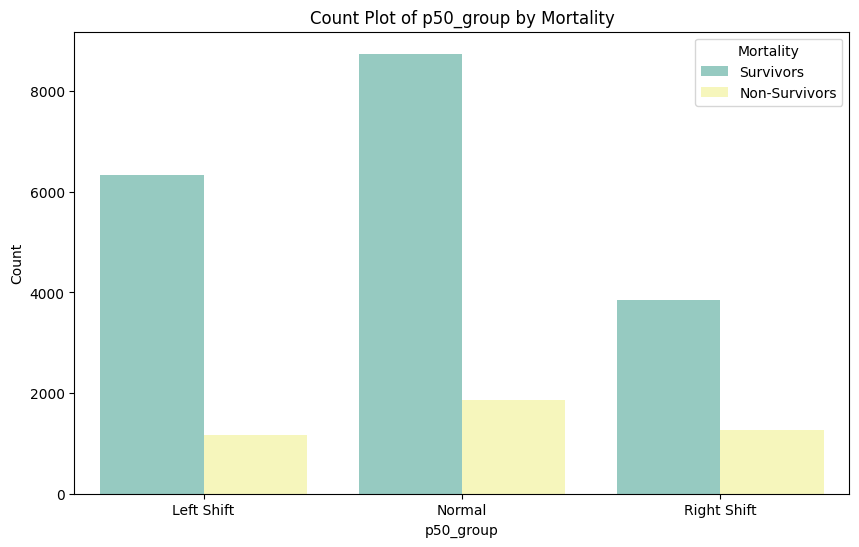

In [47]:
import matplotlib
# matplotlib.use('tkagg')  # Use Tkinter backend

import seaborn as sns
import matplotlib.pyplot as plt

# # Convert 'in_hospital_mortality' to strings ('0' or '1')
# df['in_hospital_mortality'] = df['in_hospital_mortality'].astype(str)

# Create a count plot to compare 'p50_group' categories with respect to mortality
plt.figure(figsize=(10, 6))
sns.countplot(x='p50_group', hue='in_hospital_mortality', data=df, palette='Set3', order=['Left Shift', 'Normal', 'Right Shift'])
plt.title('Count Plot of p50_group by Mortality')
plt.xlabel('p50_group')
plt.ylabel('Count')
plt.legend(title='Mortality', labels=['Survivors', 'Non-Survivors'])
plt.show()

## pH, pCO2, and HCO3 Grouping and Box Plot

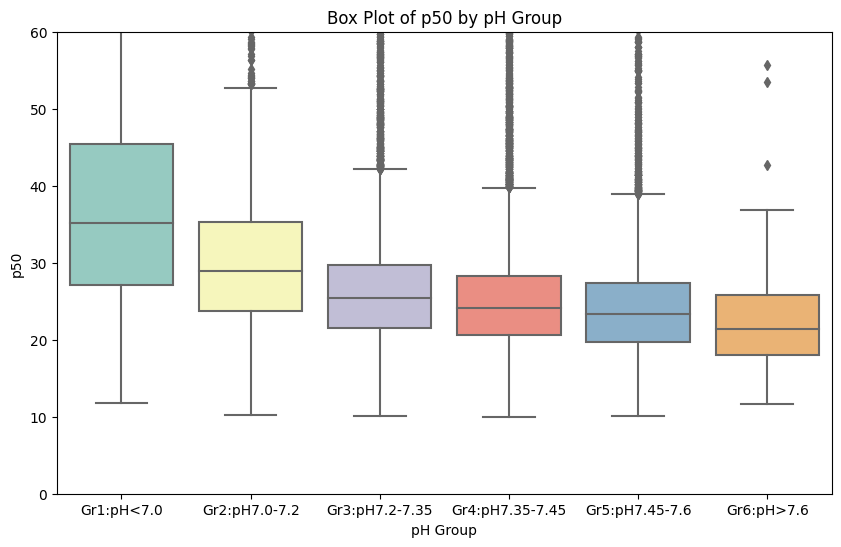

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define pH groups
def get_pH_group(pH):
    if pH < 7.0:
        return 'Gr1:pH<7.0'
    elif pH < 7.2:
        return 'Gr2:pH7.0-7.2'
    elif pH < 7.35:
        return 'Gr3:pH7.2-7.35'
    elif pH < 7.45:
        return 'Gr4:pH7.35-7.45'
    elif pH < 7.6:
        return 'Gr5:pH7.45-7.6'
    else:
        return 'Gr6:pH>7.6'

# Apply grouping functions to create new columns
df['pHGr'] = df['pH'].apply(get_pH_group)

# Specify the order of pHGr categories
order = ['Gr1:pH<7.0', 'Gr2:pH7.0-7.2', 'Gr3:pH7.2-7.35', 'Gr4:pH7.35-7.45', 'Gr5:pH7.45-7.6', 'Gr6:pH>7.6']

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='pHGr', y='p50', data=df, palette='Set3', order=order)
plt.ylim(0, 60)
plt.title('Box Plot of p50 by pH Group')
plt.xlabel('pH Group')
plt.ylabel('p50')
plt.show()


## ANOVA and Box Plot for pCO2 Groups vs. p50

                 sum_sq       df          F        PR(>F)
C(pCO2Gr)  8.393105e+03      6.0  11.951248  1.916892e-13
Residual   2.717467e+06  23217.0        NaN           NaN


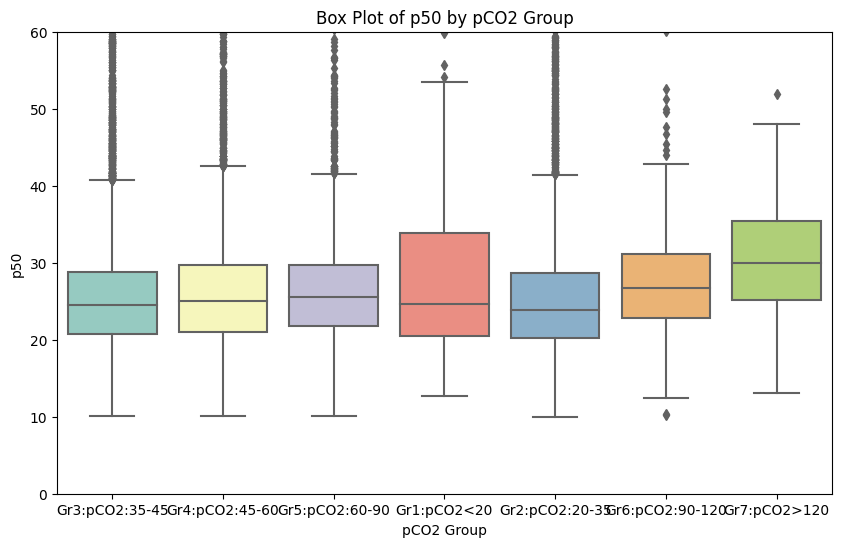

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define pCO2 groups
def get_pCO2_group(pCO2):
    if pCO2 < 20:
        return 'Gr1:pCO2<20'
    elif pCO2 < 35:
        return 'Gr2:pCO2:20-35'
    elif pCO2 < 45:
        return 'Gr3:pCO2:35-45'
    elif pCO2 < 60:
        return 'Gr4:pCO2:45-60'
    elif pCO2 < 90:
        return 'Gr5:pCO2:60-90'
    elif pCO2 < 120:
        return 'Gr6:pCO2:90-120'
    else:
        return 'Gr7:pCO2>120'

# Apply grouping functions to create new columns
df['pCO2Gr'] = df['pCO2'].apply(get_pCO2_group)

# Perform ANOVA
model = ols('p50 ~ C(pCO2Gr)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print(anova_table)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='pCO2Gr', y='p50', data=df, palette='Set3')
plt.ylim(0, 60)
plt.title('Box Plot of p50 by pCO2 Group')
plt.xlabel('pCO2 Group')
plt.ylabel('p50')
plt.show()


## ANOVA and Box Plot for HCO3 Groups vs. p50

                 sum_sq       df          F        PR(>F)
C(pCO2Gr)  8.393105e+03      6.0  11.951248  1.916892e-13
Residual   2.717467e+06  23217.0        NaN           NaN


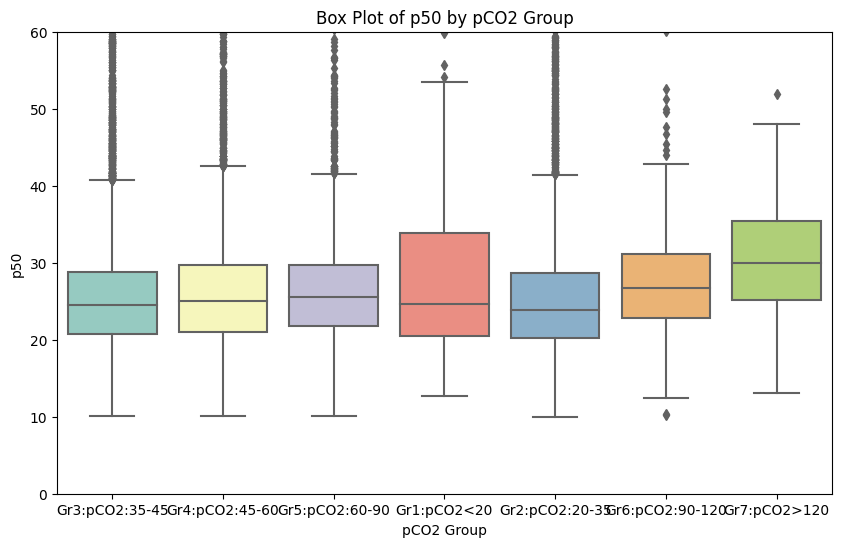

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Define pCO2 groups
def get_pCO2_group(pCO2):
    if pCO2 < 20:
        return 'Gr1:pCO2<20'
    elif pCO2 < 35:
        return 'Gr2:pCO2:20-35'
    elif pCO2 < 45:
        return 'Gr3:pCO2:35-45'
    elif pCO2 < 60:
        return 'Gr4:pCO2:45-60'
    elif pCO2 < 90:
        return 'Gr5:pCO2:60-90'
    elif pCO2 < 120:
        return 'Gr6:pCO2:90-120'
    else:
        return 'Gr7:pCO2>120'

# Apply grouping functions to create new columns
df['pCO2Gr'] = df['pCO2'].apply(get_pCO2_group)

# Perform ANOVA
model = ols('p50 ~ C(pCO2Gr)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print(anova_table)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='pCO2Gr', y='p50', data=df, palette='Set3')
plt.ylim(0, 60)
plt.title('Box Plot of p50 by pCO2 Group')
plt.xlabel('pCO2 Group')
plt.ylabel('p50')
plt.show()


                 sum_sq       df          F        PR(>F)
C(HCO3Gr)  1.588352e+04      5.0  27.216746  1.470228e-27
Residual   2.709976e+06  23218.0        NaN           NaN


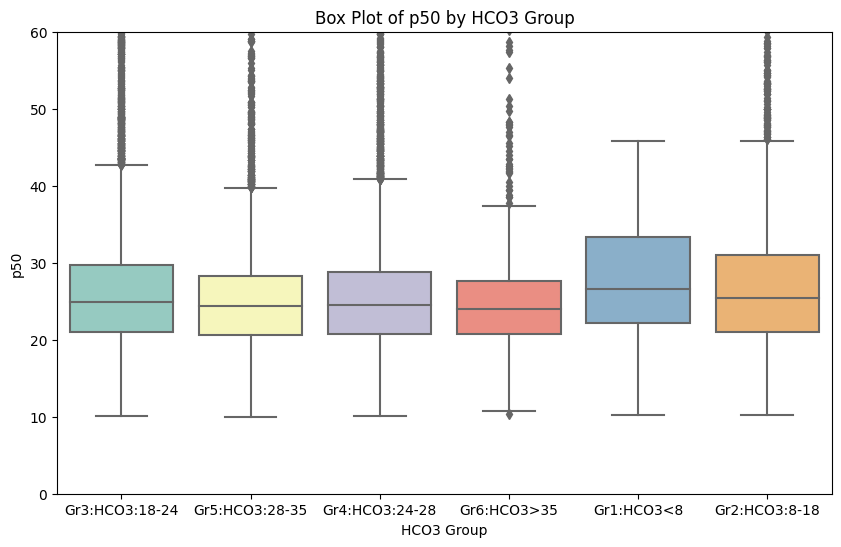

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


p50df = df

# Define HCO3 groups
def get_HCO3_group(bmp_bicarbonate):
    if bmp_bicarbonate < 8:
        return 'Gr1:HCO3<8'
    elif bmp_bicarbonate < 18:
        return 'Gr2:HCO3:8-18'
    elif bmp_bicarbonate < 24:
        return 'Gr3:HCO3:18-24'
    elif bmp_bicarbonate < 28:
        return 'Gr4:HCO3:24-28'
    elif bmp_bicarbonate < 35:
        return 'Gr5:HCO3:28-35'
    else:
        return 'Gr6:HCO3>35'

# Apply grouping functions to create a new column
p50df['HCO3Gr'] = p50df['bmp_bicarbonate'].apply(get_HCO3_group)

# Perform ANOVA
model = ols('p50 ~ C(HCO3Gr)', data=p50df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print(anova_table)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HCO3Gr', y='p50', data=p50df, palette='Set3')
plt.ylim(0, 60)
plt.title('Box Plot of p50 by HCO3 Group')
plt.xlabel('HCO3 Group')
plt.ylabel('p50')
plt.show()

## Scatter Plot with Non-Straight Regression Lines and Darker Color for Lines

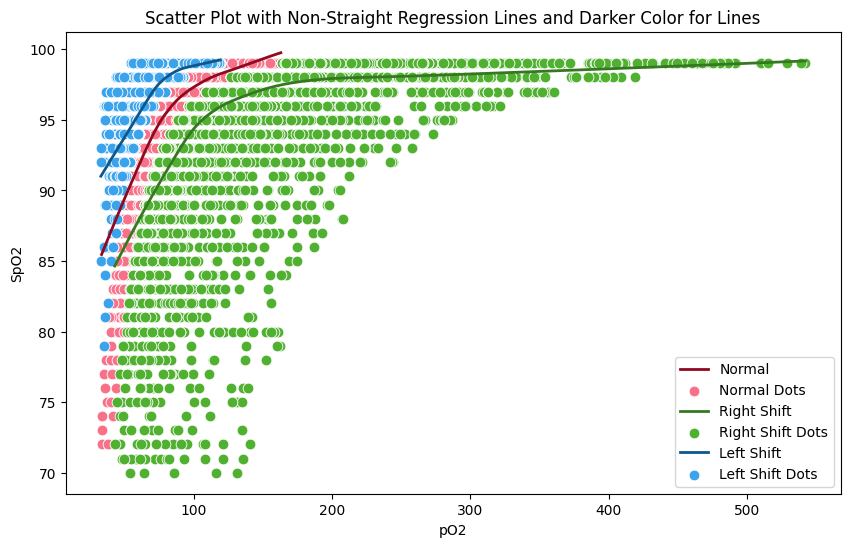

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

p50df = df

# Define a function to categorize p50 values
def p50_category(p50_value):
    if p50_value > 30:
        return 'Right Shift'
    elif 22 <= p50_value <= 30:
        return 'Normal'
    else:
        return 'Left Shift'

# Add the p50Gr column to the DataFrame
p50df['p50Gr'] = p50df['p50'].apply(p50_category)

# Linear regression models
model1 = ols('p50 ~ C(pHGr) + C(pCO2Gr) + C(HCO3Gr)', data=p50df).fit()
model2 = ols('p50 ~ pH + pCO2 + bmp_bicarbonate', data=p50df).fit()

# Recreate scatter plot with non-straight regression lines for different categories
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", len(p50df['p50Gr'].unique()))

for category, color in zip(p50df['p50Gr'].unique(), palette):
    category_data = p50df[p50df['p50Gr'] == category]

    # Choose a darker shade of the same color for the line
    line_color = sns.set_hls_values(color, l=0.3)

    sns.regplot(
        x='pO2',
        y='SpO2',
        data=category_data,
        color=line_color,
        label=category,
        lowess=True,  # Use lowess regression for non-straight lines
        scatter=False,  # Hide scatter points in the regression line
        line_kws={'lw': 2}  # Adjust line thickness as needed
    )

    sns.scatterplot(
        x='pO2',
        y='SpO2',
        data=category_data,
        color=color,
        label=f'{category} Dots',
        s=60  # Adjust the size of the dots as needed
    )

plt.title('Scatter Plot with Non-Straight Regression Lines and Darker Color for Lines')
plt.xlabel('pO2')
plt.ylabel('SpO2')
plt.legend()
plt.show()


## ANOVA on admission_age, comorbidity_score_value, sofa_past_overall_24hr

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.discrete.discrete_model import Logit
from lifelines import KaplanMeierFitter
import scipy.stats as stats

p50df = df

# Define a function to categorize p50 values
def p50_category(p50_value):
    if p50_value > 30:
        return 'Right Shift'
    elif 22 <= p50_value <= 30:
        return 'Normal'
    else:
        return 'Left Shift'

# Create the p50Gr variable based on the p50_category function
p50df['p50Gr'] = p50df['p50'].apply(p50_category)

# Perform ANOVA on admission_age
model_age = ols('admission_age ~ p50Gr', data=p50df).fit()
anova_age = anova_lm(model_age)

print("\nANOVA on admission_age:")
print(anova_age)

# Perform ANOVA on comorbidity_score_value
model_comorbidity = ols('comorbidity_score_value ~ p50Gr', data=p50df).fit()
anova_comorbidity = anova_lm(model_comorbidity)

print("\nANOVA on comorbidity_score_value:")
print(anova_comorbidity)

# Perform ANOVA on sofa_past_overall_24hr
model_sofa = ols('sofa_past_overall_24hr ~ p50Gr', data=p50df).fit()
anova_sofa = anova_lm(model_sofa)

print("\nANOVA on sofa_past_overall_24hr:")
print(anova_sofa)


ANOVA on admission_age:
               df        sum_sq      mean_sq         F    PR(>F)
p50Gr         2.0  2.813908e+03  1406.953963  5.951158  0.002607
Residual  23221.0  5.489836e+06   236.416853       NaN       NaN

ANOVA on comorbidity_score_value:
               df         sum_sq   mean_sq         F    PR(>F)
p50Gr         2.0       6.913303  3.456652  0.366059  0.693466
Residual  23221.0  219273.030505  9.442876       NaN       NaN

ANOVA on sofa_past_overall_24hr:
               df         sum_sq     mean_sq          F        PR(>F)
p50Gr         2.0     330.846555  165.423278  13.825583  9.981547e-07
Residual  23221.0  277839.569523   11.965013        NaN           NaN


## Chi-squared test

In [54]:
# Chi-squared test for p50Gr and sex_female
chisq_sex = stats.chi2_contingency(pd.crosstab(p50df['p50Gr'], p50df['sex_female']))

print("\nChi-squared test for p50Gr and sex_female:")
print(f"Chi-squared = {chisq_sex[0]:.3f}, p-value = {chisq_sex[1]:.6f}")



Chi-squared test for p50Gr and sex_female:
Chi-squared = 12.707, p-value = 0.001741


## Logistic Regression

In [55]:
import pandas as pd
import statsmodels.api as sm
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'in_hospital_mortality' is the name of your column
df['in_hospital_mortality'] = pd.to_numeric(df['in_hospital_mortality'], errors='coerce')
df['in_hospital_mortality'] = df['in_hospital_mortality'].fillna(0).astype(int)

# Logistic Regression Model 1
formula1 = "in_hospital_mortality ~ sofa_past_overall_24hr + comorbidity_score_value + admission_age"
model1 = sm.Logit.from_formula(formula1, data=df)
result1 = model1.fit()

# Logistic Regression Model 2
formula2 = "in_hospital_mortality ~ p50 + sofa_past_overall_24hr + comorbidity_score_value + admission_age"
model2 = sm.Logit.from_formula(formula2, data=df)
result2 = model2.fit()

# Summarize Model 1
print("Logistic Regression Model 1:")
print(result1.summary())

# Calculate and print odds ratios for Model 1
params_model1 = result1.params
conf_int_model1 = result1.conf_int()
conf_int_model1['Odds Ratio'] = params_model1
conf_int_model1.columns = ['2.5%', '97.5%', 'Odds Ratio']
odds_ratios_model1 = np.exp(conf_int_model1)

# Round numeric columns
odds_ratios_model1['Odds Ratio'] = odds_ratios_model1['Odds Ratio'].round(4)
odds_ratios_model1['2.5%'] = odds_ratios_model1['2.5%'].round(4)
odds_ratios_model1['97.5%'] = odds_ratios_model1['97.5%'].round(4)

# Print the odds ratios for Model 1
print("\nOdds Ratios for Model 1:")
print(odds_ratios_model1.to_string(index=False))

# Summarize Model 2
print("Logistic Regression Model 2:")
print(result2.summary())

# Calculate and print odds ratios for Model 2
params_model2 = result2.params
conf_int_model2 = result2.conf_int()
conf_int_model2['Odds Ratio'] = params_model2
conf_int_model2.columns = ['2.5%', '97.5%', 'Odds Ratio']
odds_ratios_model2 = np.exp(conf_int_model2)

# Round numeric columns
odds_ratios_model2['Odds Ratio'] = odds_ratios_model2['Odds Ratio'].round(4)
odds_ratios_model2['2.5%'] = odds_ratios_model2['2.5%'].round(4)
odds_ratios_model2['97.5%'] = odds_ratios_model2['97.5%'].round(4)

# Print the odds ratios for Model 2
print("\nOdds Ratios for Model 2:")
print(odds_ratios_model2.to_string(index=False))


Optimization terminated successfully.
         Current function value: 0.451117
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.447261
         Iterations 6
Logistic Regression Model 1:
                             Logit Regression Results                            
Dep. Variable:     in_hospital_mortality   No. Observations:                23224
Model:                             Logit   Df Residuals:                    23220
Method:                              MLE   Df Model:                            3
Date:                   Thu, 28 Dec 2023   Pseudo R-squ.:                 0.05894
Time:                           17:51:37   Log-Likelihood:                -10477.
converged:                          True   LL-Null:                       -11133.
Covariance Type:               nonrobust   LLR p-value:                2.912e-284
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------

## Kaplan-Meier Survival Curves

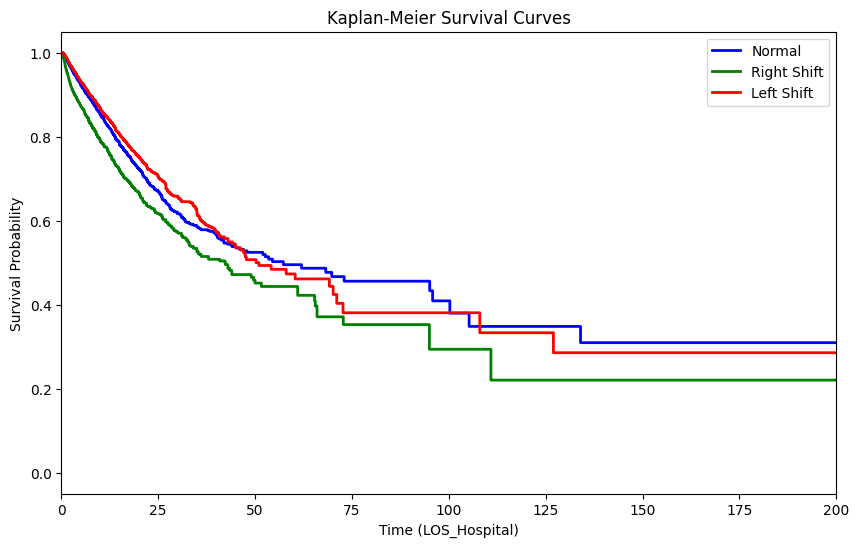

In [56]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Define a function to categorize p50 values
def p50_category(p50_value):
    if p50_value > 30:
        return 'Right Shift'
    elif 22 <= p50_value <= 30:
        return 'Normal'
    else:
        return 'Left Shift'

# Apply the p50 category function to create a new column 'p50_category'
df['p50_category'] = df['p50'].apply(p50_category)

# Create KaplanMeierFitter
kmf = KaplanMeierFitter()

# Set up plot colors
colors = ['blue', 'green', 'red']

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Set the time range between 0 and 200
ax.set_xlim(0, 200)

# Fit survival curves and plot with a finer time scale
for i, category in enumerate(df['p50_category'].unique()):
    mask = (df['p50_category'] == category)
    kmf.fit(df['los_hospital'][mask], event_observed=df['in_hospital_mortality'][mask], label=category)

    # Plot the survival curve with a step size
    kmf.plot(ax=ax, ci_show=False, color=colors[i], linewidth=2, label=category)

# Add labels to the axes
ax.set_title('Kaplan-Meier Survival Curves')
ax.set_xlabel('Time (LOS_Hospital)')
ax.set_ylabel('Survival Probability')

# Add legend
ax.legend()

plt.show()

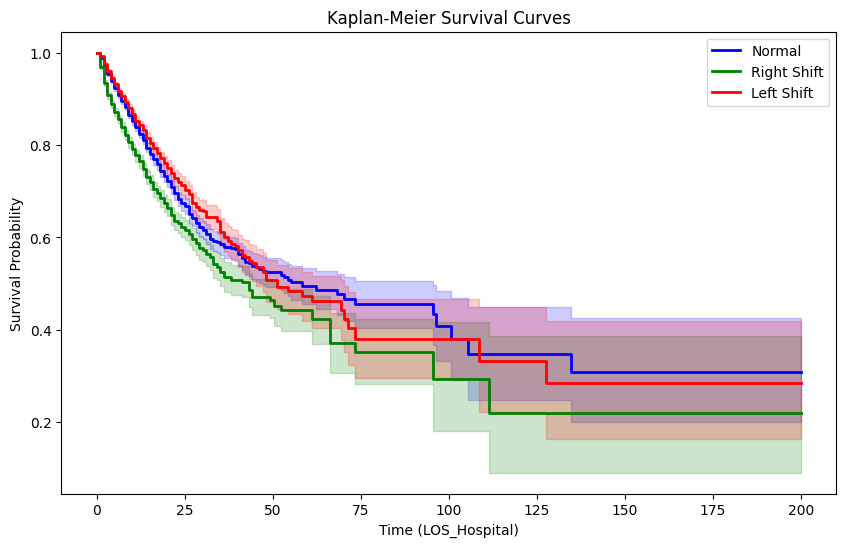

In [57]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import numpy as np

# Define a function to categorize p50 values
def p50_category(p50_value):
    if p50_value > 30:
        return 'Right Shift'
    elif 22 <= p50_value <= 30:
        return 'Normal'
    else:
        return 'Left Shift'

# Apply the p50 category function to create a new column 'p50_category'
df['p50_category'] = df['p50'].apply(p50_category)

# Create KaplanMeierFitter
kmf = KaplanMeierFitter()

# Set up plot colors
colors = ['blue', 'green', 'red']

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Define a custom time grid for smoother curves
time_grid = np.linspace(0, 200, 200)  # Adjust the range to 0-200

# Plot Kaplan-Meier survival curves with kernel smoothing
for i, category in enumerate(df['p50_category'].unique()):
    mask = (df['p50_category'] == category)
    times = df['los_hospital'][mask]
    events = df['in_hospital_mortality'][mask]

    # Plot the survival curve with kernel smoothing
    kmf.fit(times, event_observed=events, timeline=time_grid, label=category)
    kmf.plot(ax=ax, color=colors[i], linewidth=2, ci_alpha=0.2)

# Add labels to the axes
ax.set_title('Kaplan-Meier Survival Curves')
ax.set_xlabel('Time (LOS_Hospital)')
ax.set_ylabel('Survival Probability')

# Add legend
ax.legend()

plt.show()


# Analyzing the Impact of p50 on Predicting Hospital Mortality

## Simple Regression

sofa_past_overall_24hr as a predictor variable

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold


In [59]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Your data preparation code
X = df[['sofa_past_overall_24hr']]  # Predictor variable
y = df['in_hospital_mortality']  # Target variable

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='roc_auc')

# Train the model on the training data:
model.fit(X_train, y_train)

# Make predictions on the test set
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.4).astype(int)

# Calculate AUC score on the test set
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Number of bootstrap iterations
n_iterations = 1000  # You can change this value based on your preference

# Create an array to store the AUC values from the bootstrap iterations
auc_scores = []

for _ in range(n_iterations):
    # Sample with replacement from the test data
    X_boot, y_boot = resample(X_test, y_test, random_state=42)

    # Calculate AUC score on the bootstrapped data
    auc = roc_auc_score(y_boot, model.predict_proba(X_boot)[:, 1])
    auc_scores.append(auc)

# Calculate the confidence interval
alpha = 0.95  # You can change this for different confidence levels
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(auc_scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(auc_scores, p))

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f'AUC Score: {auc_score:.2f}')
print(f'95% Confidence Interval: ({lower:.2f}, {upper:.2f})')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


AUC Score: 0.62
95% Confidence Interval: (0.63, 0.63)
Accuracy: 0.82
Precision: 0.56
Recall: 0.05
F1 Score: 0.10
Confusion Matrix:
[[3764   36]
 [ 799   46]]


## Simple regression with other predictive features

### Without p50

In [60]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Select relevant columns
selected_features = [
    'sofa_past_overall_24hr',
    'comorbidity_score_value', 'cbc_hemoglobin', 'bmp_sodium', 'admission_age',
    'in_hospital_mortality', 'comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser'
]

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Split data
X = selected_df.drop('in_hospital_mortality', axis=1)
y = selected_df['in_hospital_mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale our data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# solver -> specifies the algorithm used for optimizing the logistic regression model 
# lbfgs -> suitable for small to medium-sized datasets.
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# K folds cross-validation 
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=k_fold, scoring='roc_auc')

# Train the model with the scaled data
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate AUC score on the test set
auc_score = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

# Number of bootstrap iterations
n_iterations = 1000  # You can change this value based on your preference

# Create an array to store the AUC values from the bootstrap iterations
auc_scores = []

for _ in range(n_iterations):
    # Sample with replacement from the test data
    X_boot, y_boot = resample(X_test_scaled, y_test, random_state=42)

    # Calculate AUC score on the bootstrapped data
    auc = roc_auc_score(y_boot, model.predict_proba(X_boot)[:, 1])
    auc_scores.append(auc)

# Calculate the confidence interval
alpha = 0.95  # You can change this for different confidence levels
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(auc_scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(auc_scores, p))

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Assess the coefficients for the selected features
feature_coefficients = model.coef_[0]

# Print results
print(f'AUC Score: {auc_score:.2f}')
print(f'95% Confidence Interval: ({lower:.2f}, {upper:.2f})')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

for feature, coefficient in zip(X.columns, feature_coefficients):
    print(f'Coefficient for {feature}: {coefficient:.2f}')


AUC Score: 0.68
95% Confidence Interval: (0.69, 0.69)
Accuracy: 0.82
Precision: 0.62
Recall: 0.03
F1 Score: 0.05
Coefficient for sofa_past_overall_24hr: 0.48
Coefficient for comorbidity_score_value: 0.24
Coefficient for cbc_hemoglobin: -0.05
Coefficient for bmp_sodium: -0.03
Coefficient for admission_age: 0.20
Coefficient for comorbidity_score_name_Charlson: 0.08
Coefficient for comorbidity_score_name_Elixhauser: -0.08


### With p50 

In [61]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Select relevant columns
selected_features = [ 'p50',
    'sofa_past_overall_24hr',
    'comorbidity_score_value', 'cbc_hemoglobin', 'bmp_sodium', 'admission_age',
    'in_hospital_mortality', 'comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser'
]

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Split data
X = selected_df.drop('in_hospital_mortality', axis=1)
y = selected_df['in_hospital_mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale our data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# solver -> specifies the algorithm used for optimizing the logistic regression model 
# lbfgs -> suitable for small to medium-sized datasets.
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# K folds cross-validation 
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=k_fold, scoring='roc_auc')

# Train the model with the scaled data
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate AUC score on the test set
auc_score = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

# Number of bootstrap iterations
n_iterations = 1000  # You can change this value based on your preference

# Create an array to store the AUC values from the bootstrap iterations
auc_scores = []

for _ in range(n_iterations):
    # Sample with replacement from the test data
    X_boot, y_boot = resample(X_test_scaled, y_test, random_state=42)

    # Calculate AUC score on the bootstrapped data
    auc = roc_auc_score(y_boot, model.predict_proba(X_boot)[:, 1])
    auc_scores.append(auc)

# Calculate the confidence interval
alpha = 0.95  # You can change this for different confidence levels
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(auc_scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(auc_scores, p))

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Assess the coefficients for the selected features
feature_coefficients = model.coef_[0]

# Print results
print(f'AUC Score: {auc_score:.2f}')
print(f'95% Confidence Interval: ({lower:.2f}, {upper:.2f})')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

for feature, coefficient in zip(X.columns, feature_coefficients):
    print(f'Coefficient for {feature}: {coefficient:.2f}')


AUC Score: 0.69
95% Confidence Interval: (0.69, 0.69)
Accuracy: 0.82
Precision: 0.58
Recall: 0.05
F1 Score: 0.09
Coefficient for p50: 0.22
Coefficient for sofa_past_overall_24hr: 0.47
Coefficient for comorbidity_score_value: 0.24
Coefficient for cbc_hemoglobin: -0.06
Coefficient for bmp_sodium: -0.02
Coefficient for admission_age: 0.20
Coefficient for comorbidity_score_name_Charlson: 0.08
Coefficient for comorbidity_score_name_Elixhauser: -0.08


## Comparing the performance with other ML models

### 10-fold cross-validation

#### Without p50

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Select relevant columns
selected_features = [
    'sofa_past_overall_24hr',
    'comorbidity_score_value', 'cbc_hemoglobin', 'bmp_sodium', 'admission_age',
    'in_hospital_mortality', 'comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser'
]

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Split data
X = selected_df.drop('in_hospital_mortality', axis=1)
y = selected_df['in_hospital_mortality']

# Initialize and train different models
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}

for model_name, model in models.items():
    auc_scores = []  # List to store AUC scores for each validation fold
    accuracy_scores = []  # List to store accuracy scores for each validation fold
    precision_scores = []  # List to store precision scores for each validation fold
    recall_scores = []  # List to store recall scores for each validation fold
    f1_scores = []  # List to store F1 scores for each validation fold

    # Perform 10-fold cross-validation
    k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for train_idx, test_idx in k_fold.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train_fold, y_train_fold)
        auc_fold = roc_auc_score(y_test_fold, model.predict_proba(X_test_fold)[:, 1])
        auc_scores.append(auc_fold)

        y_pred = model.predict(X_test_fold)
        accuracy_fold = accuracy_score(y_test_fold, y_pred)
        accuracy_scores.append(accuracy_fold)
        precision_fold = precision_score(y_test_fold, y_pred)
        precision_scores.append(precision_fold)
        recall_fold = recall_score(y_test_fold, y_pred)
        recall_scores.append(recall_fold)
        f1_fold = f1_score(y_test_fold, y_pred)
        f1_scores.append(f1_fold)

    # Calculate 2.5 and 97.5 percentiles to obtain the CI for AUC
    alpha = 0.95
    lower_auc = np.percentile(auc_scores, 2.5)
    upper_auc = np.percentile(auc_scores, 97.5)

    results[model_name] = {
        'AUC Scores (Validation Folds)': auc_scores,
        'AUC 95% CI': (lower_auc, upper_auc),
        'Accuracy Scores (Validation Folds)': accuracy_scores,
        'Precision Scores (Validation Folds)': precision_scores,
        'Recall Scores (Validation Folds)': recall_scores,
        'F1 Scores (Validation Folds)': f1_scores
    }

# Print results in a tabular format with 5 decimal places
print("Hospital Mortality Prediction without p50: \n")
print("{:<20} {:<15} {:<15} {:<15} {:<15} {:<15}".format('Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'))
for model_name, metrics in results.items():
    print("{:<20} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f}".format(
        model_name,
        np.mean(metrics['AUC Scores (Validation Folds)']),
        np.mean(metrics['Accuracy Scores (Validation Folds)']),
        np.mean(metrics['Precision Scores (Validation Folds)']),
        np.mean(metrics['Recall Scores (Validation Folds)']),
        np.mean(metrics['F1 Scores (Validation Folds)'])
    ))

# Add a blank line
print("\n")

# Print all the AUC CIs for the models with 5 decimal places
for model_name, metrics in results.items():
    lower_auc = metrics['AUC 95% CI'][0]
    upper_auc = metrics['AUC 95% CI'][1]
    print(f'{model_name}: AUC 95% CI ({lower_auc:.5f}, {upper_auc:.5f})')

Hospital Mortality Prediction without p50: 

Model                AUC             Accuracy        Precision       Recall          F1 Score       
Logistic Regression  0.67128         0.81627         0.58809         0.03090         0.05857        
Decision Tree        0.54135         0.70815         0.24505         0.27649         0.25979        
Random Forest        0.64908         0.80761         0.42478         0.10758         0.17163        
Gradient Boosting    0.69052         0.81648         0.54763         0.06087         0.10928        


Logistic Regression: AUC 95% CI (0.65226, 0.69379)
Decision Tree: AUC 95% CI (0.52505, 0.57285)
Random Forest: AUC 95% CI (0.62527, 0.67668)
Gradient Boosting: AUC 95% CI (0.66828, 0.71944)


#### With p50

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Select relevant columns
selected_features = ['p50',
    'sofa_past_overall_24hr',
    'comorbidity_score_value', 'cbc_hemoglobin', 'bmp_sodium', 'admission_age',
    'in_hospital_mortality', 'comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser'
]

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Split data
X = selected_df.drop('in_hospital_mortality', axis=1)
y = selected_df['in_hospital_mortality']

# Initialize and train different models
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}

for model_name, model in models.items():
    auc_scores = []  # List to store AUC scores for each validation fold
    accuracy_scores = []  # List to store accuracy scores for each validation fold
    precision_scores = []  # List to store precision scores for each validation fold
    recall_scores = []  # List to store recall scores for each validation fold
    f1_scores = []  # List to store F1 scores for each validation fold

    # Perform 10-fold cross-validation
    k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for train_idx, test_idx in k_fold.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train_fold, y_train_fold)
        auc_fold = roc_auc_score(y_test_fold, model.predict_proba(X_test_fold)[:, 1])
        auc_scores.append(auc_fold)

        y_pred = model.predict(X_test_fold)
        accuracy_fold = accuracy_score(y_test_fold, y_pred)
        accuracy_scores.append(accuracy_fold)
        precision_fold = precision_score(y_test_fold, y_pred)
        precision_scores.append(precision_fold)
        recall_fold = recall_score(y_test_fold, y_pred)
        recall_scores.append(recall_fold)
        f1_fold = f1_score(y_test_fold, y_pred)
        f1_scores.append(f1_fold)

    # Calculate 2.5 and 97.5 percentiles to obtain the CI for AUC
    alpha = 0.95
    lower_auc = np.percentile(auc_scores, 2.5)
    upper_auc = np.percentile(auc_scores, 97.5)

    results[model_name] = {
        'AUC Scores (Validation Folds)': auc_scores,
        'AUC 95% CI': (lower_auc, upper_auc),
        'Accuracy Scores (Validation Folds)': accuracy_scores,
        'Precision Scores (Validation Folds)': precision_scores,
        'Recall Scores (Validation Folds)': recall_scores,
        'F1 Scores (Validation Folds)': f1_scores
    }

# Print results in a tabular format with 5 decimal places
print("Hospital Mortality Prediction with p50: \n")
print("{:<20} {:<15} {:<15} {:<15} {:<15} {:<15}".format('Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'))
for model_name, metrics in results.items():
    print("{:<20} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f}".format(
        model_name,
        np.mean(metrics['AUC Scores (Validation Folds)']),
        np.mean(metrics['Accuracy Scores (Validation Folds)']),
        np.mean(metrics['Precision Scores (Validation Folds)']),
        np.mean(metrics['Recall Scores (Validation Folds)']),
        np.mean(metrics['F1 Scores (Validation Folds)'])
    ))

# Add a blank line
print("\n")

# Print all the AUC CIs for the models with 5 decimal places
for model_name, metrics in results.items():
    lower_auc = metrics['AUC 95% CI'][0]
    upper_auc = metrics['AUC 95% CI'][1]
    print(f'{model_name}: AUC 95% CI ({lower_auc:.5f}, {upper_auc:.5f})')

Hospital Mortality Prediction with p50: 

Model                AUC             Accuracy        Precision       Recall          F1 Score       
Logistic Regression  0.68278         0.81653         0.56608         0.04717         0.08691        
Decision Tree        0.54535         0.71616         0.25349         0.27395         0.26321        
Random Forest        0.67104         0.81123         0.45264         0.08759         0.14654        
Gradient Boosting    0.69792         0.81579         0.52787         0.07156         0.12577        


Logistic Regression: AUC 95% CI (0.66661, 0.70536)
Decision Tree: AUC 95% CI (0.53189, 0.56737)
Random Forest: AUC 95% CI (0.65719, 0.69038)
Gradient Boosting: AUC 95% CI (0.67783, 0.72702)


### Train, Validate with K folds, and test - Comparing AUC

#### Without p50 

In [64]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Select relevant columns
selected_features = [
    'sofa_past_overall_24hr',
    'comorbidity_score_value', 'cbc_hemoglobin', 'bmp_sodium', 'admission_age',
    'in_hospital_mortality', 'comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser'
]

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Split data into train, validate, and test sets
X = selected_df.drop('in_hospital_mortality', axis=1)
y = selected_df['in_hospital_mortality']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train different models
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}

for model_name, model in models.items():
    auc_scores_validate = []  # List to store AUC scores for the validation set
    auc_scores_test = []  # List to store AUC scores for the test set
    accuracy_scores_validate = []  # List to store accuracy scores for the validation set
    accuracy_scores_test = []  # List to store accuracy scores for the test set

    k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    for train_idx, val_idx in k_fold.split(X_validate, y_validate):
        X_train_fold, X_val_fold = X_validate.iloc[train_idx], X_validate.iloc[val_idx]
        y_train_fold, y_val_fold = y_validate.iloc[train_idx], y_validate.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)

        # Validation Set
        y_pred_val = model.predict(X_val_fold)
        auc_val = roc_auc_score(y_val_fold, model.predict_proba(X_val_fold)[:, 1])
        auc_scores_validate.append(auc_val)
        accuracy_val = accuracy_score(y_val_fold, y_pred_val)
        accuracy_scores_validate.append(accuracy_val)

    # Test Set
    y_pred_test = model.predict(X_test)
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    auc_scores_test.append(auc_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_scores_test.append(accuracy_test)

    results[model_name] = {
        'AUC Score (Validation Set)': np.mean(auc_scores_validate),
        'AUC Score (Test Set)': np.mean(auc_scores_test),
        'Accuracy (Validation Set)': np.mean(accuracy_scores_validate),
        'Accuracy (Test Set)': np.mean(accuracy_scores_test)
    }

# Print results
print("Model Performance:")
print("{:<20} {:<20} {:<20}".format('Model', 'Validation Set', 'Test Set'))
for model_name, metrics in results.items():
    print("{:<20} {:<20.5f} {:<20.5f}".format(
        model_name,
        metrics['AUC Score (Validation Set)'],
        metrics['AUC Score (Test Set)']
    ))


Model Performance:
Model                Validation Set       Test Set            
Logistic Regression  0.67437              0.66183             
Decision Tree        0.54519              0.53850             
Random Forest        0.63222              0.63108             
Gradient Boosting    0.67312              0.67048             


#### with p50 

In [65]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Select relevant columns
selected_features = ['p50',
    'sofa_past_overall_24hr',
    'comorbidity_score_value', 'cbc_hemoglobin', 'bmp_sodium', 'admission_age',
    'in_hospital_mortality', 'comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser'
]

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Split data into train, validate, and test sets
X = selected_df.drop('in_hospital_mortality', axis=1)
y = selected_df['in_hospital_mortality']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train different models
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}

for model_name, model in models.items():
    auc_scores_validate = []  # List to store AUC scores for the validation set
    auc_scores_test = []  # List to store AUC scores for the test set
    accuracy_scores_validate = []  # List to store accuracy scores for the validation set
    accuracy_scores_test = []  # List to store accuracy scores for the test set

    k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    for train_idx, val_idx in k_fold.split(X_validate, y_validate):
        X_train_fold, X_val_fold = X_validate.iloc[train_idx], X_validate.iloc[val_idx]
        y_train_fold, y_val_fold = y_validate.iloc[train_idx], y_validate.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)

        # Validation Set
        y_pred_val = model.predict(X_val_fold)
        auc_val = roc_auc_score(y_val_fold, model.predict_proba(X_val_fold)[:, 1])
        auc_scores_validate.append(auc_val)
        accuracy_val = accuracy_score(y_val_fold, y_pred_val)
        accuracy_scores_validate.append(accuracy_val)

    # Test Set
    y_pred_test = model.predict(X_test)
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    auc_scores_test.append(auc_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_scores_test.append(accuracy_test)

    results[model_name] = {
        'AUC Score (Validation Set)': np.mean(auc_scores_validate),
        'AUC Score (Test Set)': np.mean(auc_scores_test),
        'Accuracy (Validation Set)': np.mean(accuracy_scores_validate),
        'Accuracy (Test Set)': np.mean(accuracy_scores_test)
    }

# Print results
print("Model Performance:")
print("{:<20} {:<20} {:<20}".format('Model', 'Validation Set', 'Test Set'))
for model_name, metrics in results.items():
    print("{:<20} {:<20.5f} {:<20.5f}".format(
        model_name,
        metrics['AUC Score (Validation Set)'],
        metrics['AUC Score (Test Set)']
    ))


Model Performance:
Model                Validation Set       Test Set            
Logistic Regression  0.68112              0.67374             
Decision Tree        0.54483              0.54373             
Random Forest        0.65659              0.65919             
Gradient Boosting    0.67704              0.68303             


### Train, Validate with K folds, and test - Comparing AUC, Accuracy, Precision, Recall, F1

#### Without p50 

In [66]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Select relevant columns
selected_features = [
    'sofa_past_overall_24hr',
    'comorbidity_score_value', 'cbc_hemoglobin', 'bmp_sodium', 'admission_age',
    'in_hospital_mortality', 'comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser'
]

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Split data into train, validate, and test sets
X = selected_df.drop('in_hospital_mortality', axis=1)
y = selected_df['in_hospital_mortality']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train different models
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results_validate = {}
results_test = {}

for model_name, model in models.items():
    auc_scores_validate = []  # List to store AUC scores for each validation fold
    accuracy_scores_validate = []  # List to store accuracy scores for each validation fold
    precision_scores_validate = []  # List to store precision scores for each validation fold
    recall_scores_validate = []  # List to store recall scores for each validation fold
    f1_scores_validate = []  # List to store F1 scores for each validation fold

    auc_scores_test = []  # List to store AUC scores for the test set
    accuracy_scores_test = []  # List to store accuracy scores for the test set
    precision_scores_test = []  # List to store precision scores for the test set
    recall_scores_test = []  # List to store recall scores for the test set
    f1_scores_test = []  # List to store F1 scores for the test set

    # Perform 10-fold cross-validation on the validation set
    k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for train_idx, validate_idx in k_fold.split(X_validate, y_validate):
        X_train_fold, X_validate_fold = X_validate.iloc[train_idx], X_validate.iloc[validate_idx]
        y_train_fold, y_validate_fold = y_validate.iloc[train_idx], y_validate.iloc[validate_idx]

        model.fit(X_train_fold, y_train_fold)
        auc_fold_validate = roc_auc_score(y_validate_fold, model.predict_proba(X_validate_fold)[:, 1])
        auc_scores_validate.append(auc_fold_validate)

        y_pred_validate = model.predict(X_validate_fold)
        accuracy_fold_validate = accuracy_score(y_validate_fold, y_pred_validate)
        accuracy_scores_validate.append(accuracy_fold_validate)
        precision_fold_validate = precision_score(y_validate_fold, y_pred_validate)
        precision_scores_validate.append(precision_fold_validate)
        recall_fold_validate = recall_score(y_validate_fold, y_pred_validate)
        recall_scores_validate.append(recall_fold_validate)
        f1_fold_validate = f1_score(y_validate_fold, y_pred_validate)
        f1_scores_validate.append(f1_fold_validate)

    # Now evaluate on the test set
    y_pred_test = model.predict(X_test)
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    auc_scores_test.append(auc_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_scores_test.append(accuracy_test)
    precision_test = precision_score(y_test, y_pred_test)
    precision_scores_test.append(precision_test)
    recall_test = recall_score(y_test, y_pred_test)
    recall_scores_test.append(recall_test)
    f1_test = f1_score(y_test, y_pred_test)
    f1_scores_test.append(f1_test)

    # Calculate 2.5 and 97.5 percentiles to obtain the CI for AUC on the validation set
    alpha = 0.95
    lower_auc_validate = np.percentile(auc_scores_validate, 2.5)
    upper_auc_validate = np.percentile(auc_scores_validate, 97.5)

    results_validate[model_name] = {
        'AUC Scores (Validation Folds)': auc_scores_validate,
        'AUC 95% CI': (lower_auc_validate, upper_auc_validate),
        'Accuracy Scores (Validation Folds)': accuracy_scores_validate,
        'Precision Scores (Validation Folds)': precision_scores_validate,
        'Recall Scores (Validation Folds)': recall_scores_validate,
        'F1 Scores (Validation Folds)': f1_scores_validate
    }

    # Store the test set metrics
    results_test[model_name] = {
        'AUC Test Score': np.mean(auc_scores_test),
        'Accuracy Test Score': np.mean(accuracy_scores_test),
        'Precision Test Score': np.mean(precision_scores_test),
        'Recall Test Score': np.mean(recall_scores_test),
        'F1 Test Score': np.mean(f1_scores_test)
    }


print("Hospital Mortality Prediction without p50: \n")
# Add a blank line
print("\n")

# Print results for the validation set in a tabular format with 5 decimal places
print("Validation Set Metrics: \n")
print("{:<20} {:<15} {:<15} {:<15} {:<15} {:<15}".format('Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'))
for model_name, metrics in results_validate.items():
    print("{:<20} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f}".format(
        model_name,
        np.mean(metrics['AUC Scores (Validation Folds)']),
        np.mean(metrics['Accuracy Scores (Validation Folds)']),
        np.mean(metrics['Precision Scores (Validation Folds)']),
        np.mean(metrics['Recall Scores (Validation Folds)']),
        np.mean(metrics['F1 Scores (Validation Folds)'])
    ))

# Add a blank line
print("\n")

# Print all the AUC CIs for the models on the validation set with 5 decimal places
for model_name, metrics in results_validate.items():
    lower_auc_validate = metrics['AUC 95% CI'][0]
    upper_auc_validate = metrics['AUC 95% CI'][1]
    print(f'{model_name}: AUC 95% CI (Validation) ({lower_auc_validate:.5f}, {upper_auc_validate:.5f})')

# Print results for the test set tabular format with 5 decimal places
print("\nTest Set Metrics: \n")
print("{:<20} {:<15} {:<15} {:<15} {:<15} {:<15}".format('Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'))
for model_name, metrics in results_test.items():
    print("{:<20} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f}".format(
        model_name,
        metrics['AUC Test Score'],
        metrics['Accuracy Test Score'],
        metrics['Precision Test Score'],
        metrics['Recall Test Score'],
        metrics['F1 Test Score']
    ))

# Add a blank line
print("\n")


Hospital Mortality Prediction without p50: 



Validation Set Metrics: 

Model                AUC             Accuracy        Precision       Recall          F1 Score       
Logistic Regression  0.67437         0.81917         0.58214         0.03616         0.06735        
Decision Tree        0.54094         0.71183         0.24127         0.27237         0.25521        
Random Forest        0.64115         0.81400         0.46074         0.10699         0.17309        
Gradient Boosting    0.67352         0.81457         0.47182         0.07708         0.13178        


Logistic Regression: AUC 95% CI (Validation) (0.60135, 0.73150)
Decision Tree: AUC 95% CI (Validation) (0.50413, 0.60586)
Random Forest: AUC 95% CI (Validation) (0.58019, 0.67693)
Gradient Boosting: AUC 95% CI (Validation) (0.59779, 0.73173)

Test Set Metrics: 

Model                AUC             Accuracy        Precision       Recall          F1 Score       
Logistic Regression  0.66183         0.81200         0.5

#### With p50

In [67]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Select relevant columns
selected_features = ['p50',
    'sofa_past_overall_24hr',
    'comorbidity_score_value', 'cbc_hemoglobin', 'bmp_sodium', 'admission_age',
    'in_hospital_mortality', 'comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser'
]

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Split data into train, validate, and test sets
X = selected_df.drop('in_hospital_mortality', axis=1)
y = selected_df['in_hospital_mortality']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train different models
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results_validate = {}
results_test = {}

for model_name, model in models.items():
    auc_scores_validate = []  # List to store AUC scores for each validation fold
    accuracy_scores_validate = []  # List to store accuracy scores for each validation fold
    precision_scores_validate = []  # List to store precision scores for each validation fold
    recall_scores_validate = []  # List to store recall scores for each validation fold
    f1_scores_validate = []  # List to store F1 scores for each validation fold

    auc_scores_test = []  # List to store AUC scores for the test set
    accuracy_scores_test = []  # List to store accuracy scores for the test set
    precision_scores_test = []  # List to store precision scores for the test set
    recall_scores_test = []  # List to store recall scores for the test set
    f1_scores_test = []  # List to store F1 scores for the test set

    # Perform 10-fold cross-validation on the validation set
    k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for train_idx, validate_idx in k_fold.split(X_validate, y_validate):
        X_train_fold, X_validate_fold = X_validate.iloc[train_idx], X_validate.iloc[validate_idx]
        y_train_fold, y_validate_fold = y_validate.iloc[train_idx], y_validate.iloc[validate_idx]

        model.fit(X_train_fold, y_train_fold)
        auc_fold_validate = roc_auc_score(y_validate_fold, model.predict_proba(X_validate_fold)[:, 1])
        auc_scores_validate.append(auc_fold_validate)

        y_pred_validate = model.predict(X_validate_fold)
        accuracy_fold_validate = accuracy_score(y_validate_fold, y_pred_validate)
        accuracy_scores_validate.append(accuracy_fold_validate)
        precision_fold_validate = precision_score(y_validate_fold, y_pred_validate)
        precision_scores_validate.append(precision_fold_validate)
        recall_fold_validate = recall_score(y_validate_fold, y_pred_validate)
        recall_scores_validate.append(recall_fold_validate)
        f1_fold_validate = f1_score(y_validate_fold, y_pred_validate)
        f1_scores_validate.append(f1_fold_validate)

    # Now evaluate on the test set
    y_pred_test = model.predict(X_test)
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    auc_scores_test.append(auc_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_scores_test.append(accuracy_test)
    precision_test = precision_score(y_test, y_pred_test)
    precision_scores_test.append(precision_test)
    recall_test = recall_score(y_test, y_pred_test)
    recall_scores_test.append(recall_test)
    f1_test = f1_score(y_test, y_pred_test)
    f1_scores_test.append(f1_test)

    # Calculate 2.5 and 97.5 percentiles to obtain the CI for AUC on the validation set
    alpha = 0.95
    lower_auc_validate = np.percentile(auc_scores_validate, 2.5)
    upper_auc_validate = np.percentile(auc_scores_validate, 97.5)

    results_validate[model_name] = {
        'AUC Scores (Validation Folds)': auc_scores_validate,
        'AUC 95% CI': (lower_auc_validate, upper_auc_validate),
        'Accuracy Scores (Validation Folds)': accuracy_scores_validate,
        'Precision Scores (Validation Folds)': precision_scores_validate,
        'Recall Scores (Validation Folds)': recall_scores_validate,
        'F1 Scores (Validation Folds)': f1_scores_validate
    }

    # Store the test set metrics
    results_test[model_name] = {
        'AUC Test Score': np.mean(auc_scores_test),
        'Accuracy Test Score': np.mean(accuracy_scores_test),
        'Precision Test Score': np.mean(precision_scores_test),
        'Recall Test Score': np.mean(recall_scores_test),
        'F1 Test Score': np.mean(f1_scores_test)
    }



print("Hospital Mortality Prediction with p50: \n")
# Add a blank line
print("\n")

# Print results for the validation set in a tabular format with 5 decimal places
print("Validation Set Metrics: \n")
print("{:<20} {:<15} {:<15} {:<15} {:<15} {:<15}".format('Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'))
for model_name, metrics in results_validate.items():
    print("{:<20} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f}".format(
        model_name,
        np.mean(metrics['AUC Scores (Validation Folds)']),
        np.mean(metrics['Accuracy Scores (Validation Folds)']),
        np.mean(metrics['Precision Scores (Validation Folds)']),
        np.mean(metrics['Recall Scores (Validation Folds)']),
        np.mean(metrics['F1 Scores (Validation Folds)'])
    ))

# Add a blank line
print("\n")

# Print all the AUC CIs for the models on the validation set with 5 decimal places
for model_name, metrics in results_validate.items():
    lower_auc_validate = metrics['AUC 95% CI'][0]
    upper_auc_validate = metrics['AUC 95% CI'][1]
    print(f'{model_name}: AUC 95% CI (Validation) ({lower_auc_validate:.5f}, {upper_auc_validate:.5f})')

# Print results for the test set tabular format with 5 decimal places
print("\nTest Set Metrics: \n")
print("{:<20} {:<15} {:<15} {:<15} {:<15} {:<15}".format('Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'))
for model_name, metrics in results_test.items():
    print("{:<20} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f}".format(
        model_name,
        metrics['AUC Test Score'],
        metrics['Accuracy Test Score'],
        metrics['Precision Test Score'],
        metrics['Recall Test Score'],
        metrics['F1 Test Score']
    ))

# Add a blank line
print("\n")


Hospital Mortality Prediction with p50: 



Validation Set Metrics: 

Model                AUC             Accuracy        Precision       Recall          F1 Score       
Logistic Regression  0.68112         0.81946         0.58619         0.04405         0.08114        
Decision Tree        0.54820         0.71642         0.25183         0.28348         0.26653        
Random Forest        0.66217         0.81773         0.50808         0.08492         0.14395        
Gradient Boosting    0.67703         0.81544         0.45565         0.07860         0.13291        


Logistic Regression: AUC 95% CI (Validation) (0.59933, 0.73335)
Decision Tree: AUC 95% CI (Validation) (0.50579, 0.57987)
Random Forest: AUC 95% CI (Validation) (0.60795, 0.70900)
Gradient Boosting: AUC 95% CI (Validation) (0.61381, 0.73757)

Test Set Metrics: 

Model                AUC             Accuracy        Precision       Recall          F1 Score       
Logistic Regression  0.67374         0.81228         0.5428

Out of the 4 models, Gradient Boosting is performing the best overall. 

### Next steps: 
* Optimizing further Grading Boosting to further prove the predictive power of p50
    * GridSearchCV
* Analyzing feature importance for each model -> provide insights into the model's decision-making process.
* "By incorporating the p50 feature into pre-trained mortality prediction models, we aim to assess whether this addition leads to an improvement in accuracy. 
  *  OASIS
  *  "Reproducibility in critical care: a mortality prediction case study" Link: https://proceedings.mlr.press/v68/johnson17a.html